In [ ]:
# ICICI BANK SYMBOL IS 'IBN'
# INFOSIS SYMBOL IS 'INFY'
# GENERAL MOTORS SYMBOL IS 'GM'
# HSVC BANK SYMBOL IS 'HSBC'

!pip install pandas-datareader

In [ ]:
# ICICI BANK SYMBOL IS 'IBN'
# using icici datasets

import pandas_datareader as pdr
import pandas as pd
import datetime

start = datetime.datetime(2018,1,1)
end = datetime.datetime(2024,1,1)
print(start)
print(end)



2018-01-01 00:00:00
2024-01-01 00:00:00


In [ ]:
stock=['IBN']
data = pdr.DataReader(stock,'stooq',str(start.date()),end.date()).stack('Symbols')
data.head()

,Attributes,Close,High,Low,Open,Volume
Date,Symbols,,,,,
2023-12-29,IBN,23.84,24.000,23.73,24.00,3082012.0
2023-12-28,IBN,24.22,24.310,24.10,24.10,3479956.0
2023-12-27,IBN,24.02,24.080,23.90,23.94,2583062.0
2023-12-26,IBN,23.88,24.005,23.87,23.92,2778435.0
2023-12-22,IBN,23.82,23.950,23.74,23.95,3971946.0


In [ ]:
ndata = data.reset_index()
ndata.head()
ndata.to_csv('ICICI_stock_2018_to_2024.csv')

In [ ]:
from os import close
# plot the close price from tesla stock
# load the csv file

dibn = pd.read_csv('/content/ICICI_stock_2018_to_2024.csv')

# set date as the index
dibn.set_index('Date',inplace=True)
dibn.sort_index(ascending=True,inplace=True)
dibn.head()

# separate the close price
cl_dibn = dibn['Close']



<Axes: title={'center': 'Tesla stock price'}, xlabel='Date', ylabel='Price'>

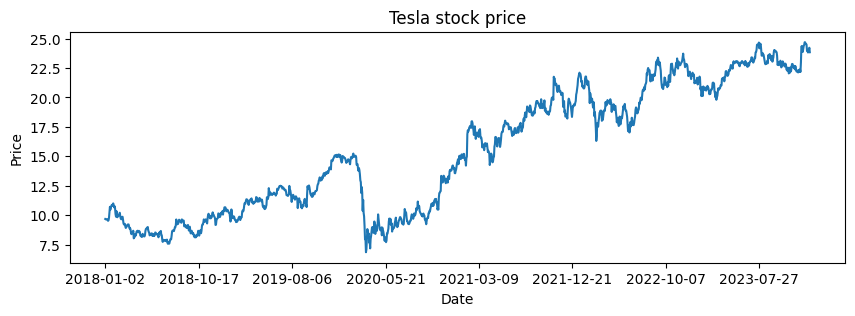

In [ ]:
# plot the close price
import matplotlib.pyplot as plt

cl_dibn.plot(xlabel='Date',ylabel='Price',
               label='Tsla',title='Tesla stock price',figsize=(10,3))



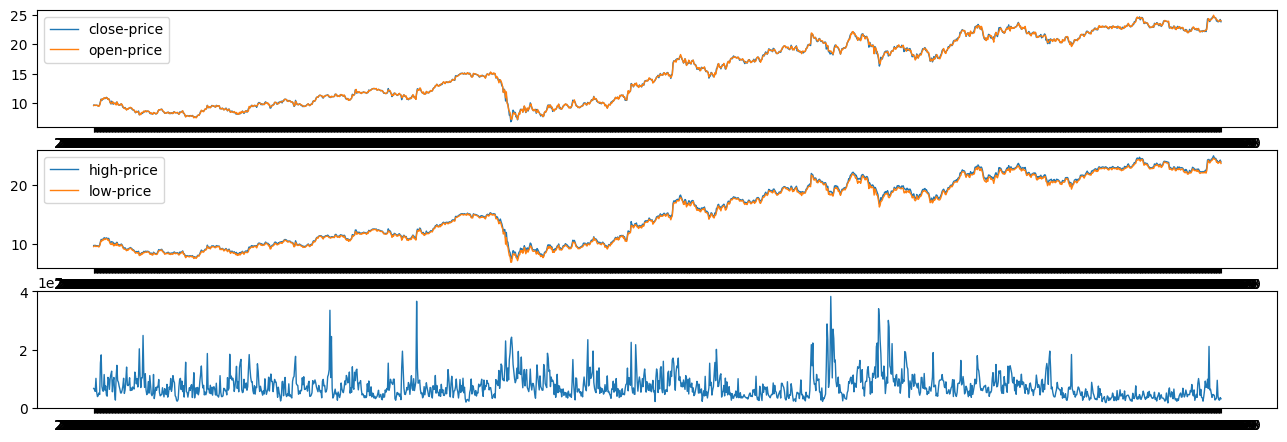

In [ ]:
plt.figure(2,(16,7))
plt.subplot(4,1,1)
plt.plot(dibn['Close'],label='close-price',linewidth=1)
plt.plot(dibn['Open'],label='open-price',linewidth=1)
plt.legend()


plt.subplot(4,1,2)
plt.plot(dibn['High'],label='high-price',linewidth=1)
plt.plot(dibn['Low'],label='low-price',linewidth=1)
plt.legend()

plt.subplot(4,1,3)
plt.plot(dibn['Volume'],label='Volumne',linewidth=1)

In [ ]:
dibn.head()

,Unnamed: 0,Symbols,Close,High,Low,Open,Volume
Date,,,,,,,
2018-01-02,1508,IBN,9.67081,9.68075,9.50469,9.58228,6.635720e+06
2018-01-03,1507,IBN,9.65091,9.70065,9.63201,9.68075,6.277079e+06
2018-01-04,1506,IBN,9.62207,9.71060,9.60217,9.67081,5.625544e+06
2018-01-05,1505,IBN,9.64196,9.65091,9.50469,9.62207,1.010170e+07
2018-01-08,1504,IBN,9.65091,9.66086,9.57332,9.65091,5.311405e+06


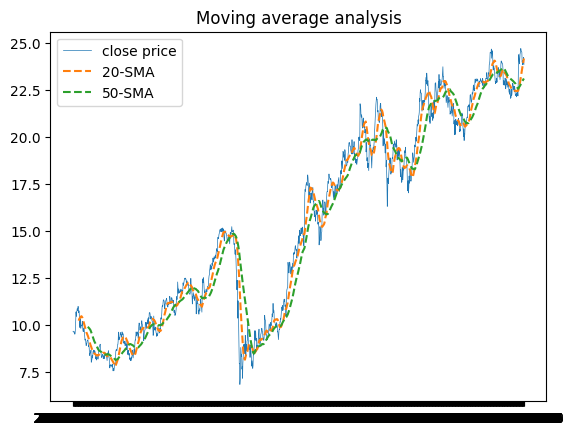

In [ ]:
# calculate the MOVING AVERAGE
dibn['SMA_20'] = dibn['Close'].rolling(20).mean()
dibn['SMA_50'] = dibn['Close'].rolling(50).mean()
plt.figure(1)
plt.plot(dibn['Close'],label='close price',linewidth=0.5)
plt.plot(dibn['SMA_20'],label='20-SMA',linestyle='--')
plt.plot(dibn['SMA_50'],label='50-SMA',linestyle='--')

plt.title('Moving average analysis')
plt.legend()

In [ ]:
!pip install ta

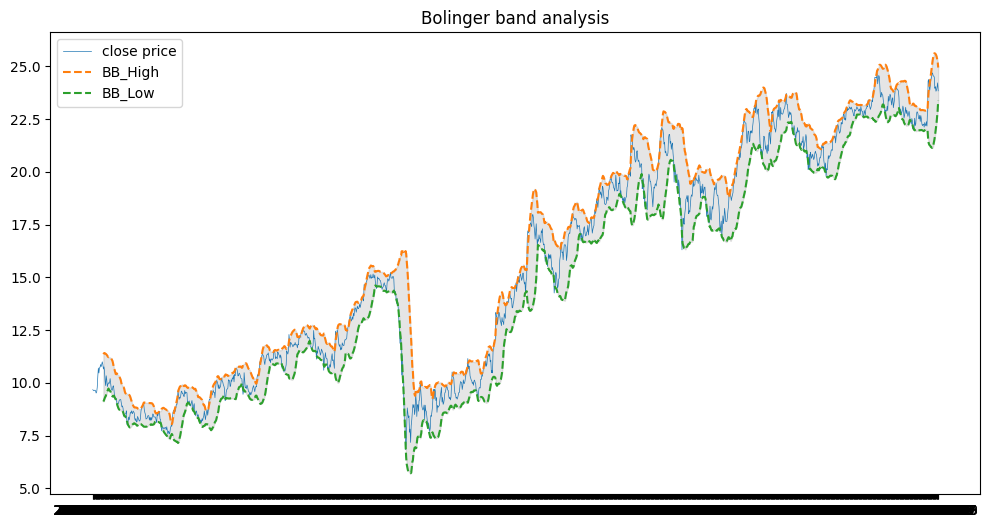

In [ ]:
import ta

#BOLLINGER BANDS
bb = ta.volatility.BollingerBands(dibn['Close'],window=20,window_dev=2)
dibn['BB_High'] = bb.bollinger_hband()
dibn['BB_Low'] = bb.bollinger_lband()

# calculate the with Bollinger Bands moving average
plt.figure(1,(12,6))
plt.plot(dibn['Close'],label='close price',linewidth=0.5)
plt.plot(dibn['BB_High'],label='BB_High',linestyle='--')
plt.plot(dibn['BB_Low'],label='BB_Low',linestyle='--')
plt.fill_between(dibn.index,dibn['BB_High'],
                 dibn['BB_Low'],color = 'gray',alpha=0.2)
plt.title('Bolinger band analysis')
plt.legend()


In [ ]:
# RELATIVE STRENGTH INDEX
dibn['RSI'] = ta.momentum.rsi(dibn['Close'],window=14)
# dibn.head()
dibn.tail()

,Unnamed: 0,Symbols,Close,High,Low,Open,Volume,SMA_20,SMA_50,BB_High,BB_Low,RSI
Date,,,,,,,,,,,,
2023-12-22,4,IBN,23.82,23.950,23.74,23.95,3971946.0,23.8110,22.9904,25.554639,22.067361,52.639293
2023-12-26,3,IBN,23.88,24.005,23.87,23.92,2778435.0,23.8935,23.0132,25.479089,22.307911,53.642778
2023-12-27,2,IBN,24.02,24.080,23.90,23.94,2583062.0,23.9855,23.0362,25.362533,22.608467,55.986162
2023-12-28,1,IBN,24.22,24.310,24.10,24.10,3479956.0,24.0775,23.0658,25.242762,22.912238,59.162128
2023-12-29,0,IBN,23.84,24.000,23.73,24.00,3082012.0,24.1610,23.0952,24.944273,23.377727,51.550803


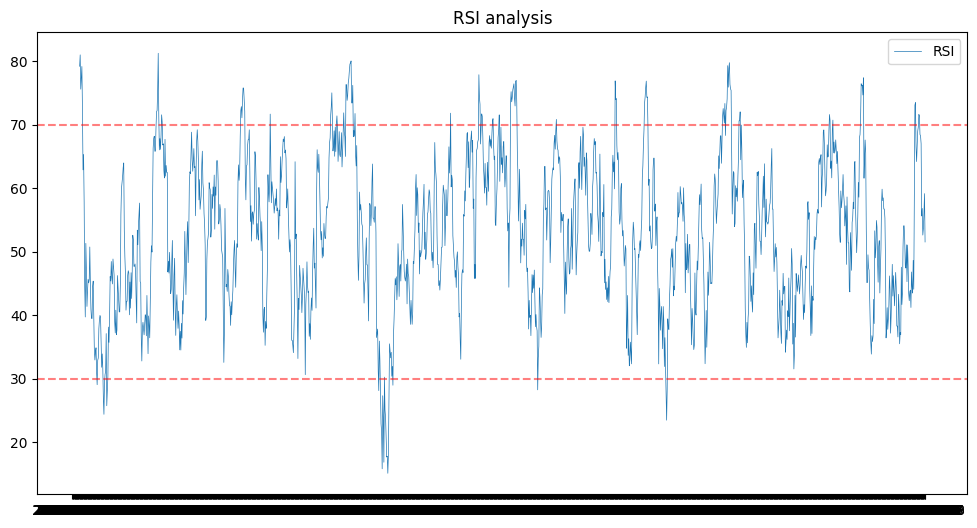

In [ ]:
plt.figure(1,(12,6))
plt.plot(dibn['RSI'],label='RSI',linewidth=0.5)
plt.axhline(70,linestyle='--',color='red',alpha=0.5)
plt.axhline(30,linestyle='--',color='red',alpha=0.5)
plt.title('RSI analysis')
plt.legend()


In [ ]:
dibn.to_csv('ICICI_stock_analysis_2018_to_2024.csv')

In [ ]:
dibn.tail()
# dibn.info()

,Unnamed: 0,Symbols,Close,High,Low,Open,Volume,SMA_20,SMA_50,BB_High,BB_Low,RSI
Date,,,,,,,,,,,,
2023-12-22,4,IBN,23.82,23.950,23.74,23.95,3971946.0,23.8110,22.9904,25.554639,22.067361,52.639293
2023-12-26,3,IBN,23.88,24.005,23.87,23.92,2778435.0,23.8935,23.0132,25.479089,22.307911,53.642778
2023-12-27,2,IBN,24.02,24.080,23.90,23.94,2583062.0,23.9855,23.0362,25.362533,22.608467,55.986162
2023-12-28,1,IBN,24.22,24.310,24.10,24.10,3479956.0,24.0775,23.0658,25.242762,22.912238,59.162128
2023-12-29,0,IBN,23.84,24.000,23.73,24.00,3082012.0,24.1610,23.0952,24.944273,23.377727,51.550803


In [ ]:
# INFOSIS SYMBOL IS 'INFY'
# using infosys datasets

import pandas_datareader as pdr
import pandas as pd
import datetime

start = datetime.datetime(2018,1,1)
end = datetime.datetime(2024,1,1)
print(start)
print(end)

# saving required data into variable
stock=['INFY']
data = pdr.DataReader(stock,'stooq',str(start.date()),end.date()).stack('Symbols')
data.head()

#creating csv file
ndata = data.reset_index()
ndata.head()
ndata.to_csv('infosys_stock_2018_to_2024.csv')

2018-01-01 00:00:00
2024-01-01 00:00:00


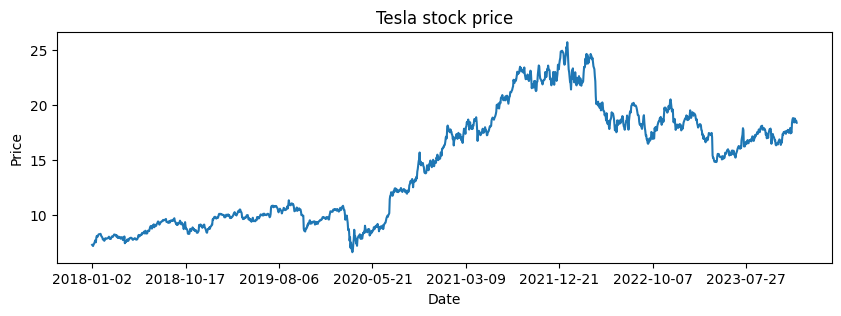

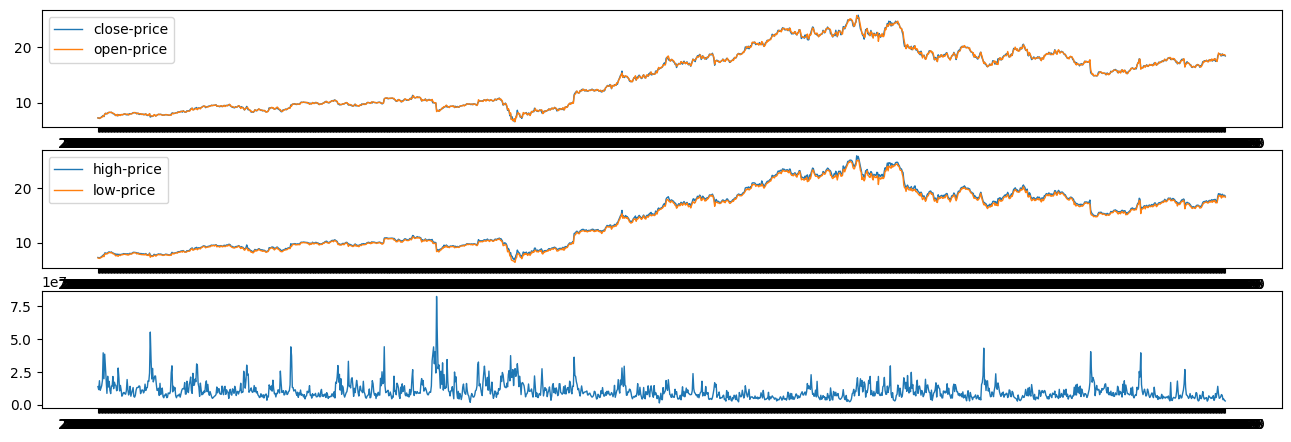

In [ ]:
from os import close
# plot the close price from infosys stock
# load the csv file

dif = pd.read_csv('/content/infosys_stock_2018_to_2024.csv')

# set date as the index
dif.set_index('Date',inplace=True)
dif.sort_index(ascending=True,inplace=True)
dif.head()

# separate the close price
cl_dibn = dif['Close']

# plot the close price
import matplotlib.pyplot as plt

cl_dibn.plot(xlabel='Date',ylabel='Price',
               label='Tsla',title='Tesla stock price',figsize=(10,3))

# plotting the diiferences
plt.figure(2,(16,7))
plt.subplot(4,1,1)
plt.plot(dif['Close'],label='close-price',linewidth=1)
plt.plot(dif['Open'],label='open-price',linewidth=1)
plt.legend()


plt.subplot(4,1,2)
plt.plot(dif['High'],label='high-price',linewidth=1)
plt.plot(dif['Low'],label='low-price',linewidth=1)
plt.legend()

plt.subplot(4,1,3)
plt.plot(dif['Volume'],label='Volumne',linewidth=1)

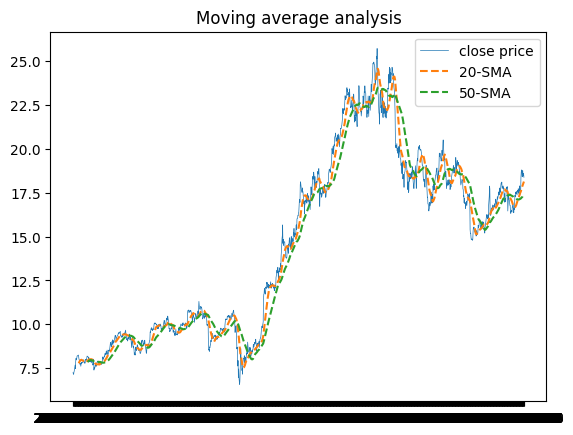

In [ ]:
dif.head()

# calculate the MOVING AVERAGE
dif['SMA_20'] = dif['Close'].rolling(20).mean()
dif['SMA_50'] = dif['Close'].rolling(50).mean()
plt.figure(1)
plt.plot(dif['Close'],label='close price',linewidth=0.5)
plt.plot(dif['SMA_20'],label='20-SMA',linestyle='--')
plt.plot(dif['SMA_50'],label='50-SMA',linestyle='--')

plt.title('Moving average analysis')
plt.legend()

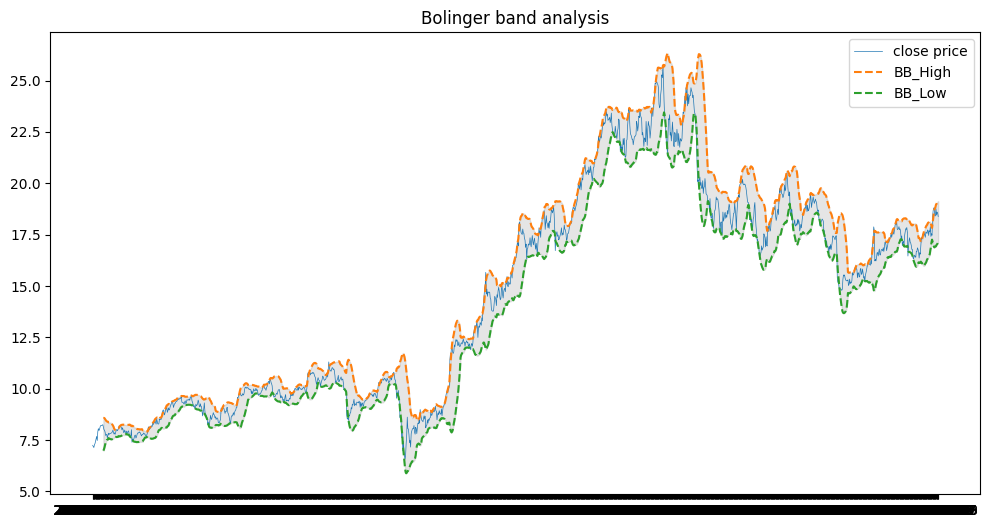

In [ ]:
import ta

#BOLLINGER BANDS
bb = ta.volatility.BollingerBands(dif['Close'],window=20,window_dev=2)
dif['BB_High'] = bb.bollinger_hband()
dif['BB_Low'] = bb.bollinger_lband()

# calculate the with Bollinger Bands moving average
plt.figure(1,(12,6))
plt.plot(dif['Close'],label='close price',linewidth=0.5)
plt.plot(dif['BB_High'],label='BB_High',linestyle='--')
plt.plot(dif['BB_Low'],label='BB_Low',linestyle='--')
plt.fill_between(dif.index,dif['BB_High'],
                 dif['BB_Low'],color = 'gray',alpha=0.2)
plt.title('Bolinger band analysis')
plt.legend()


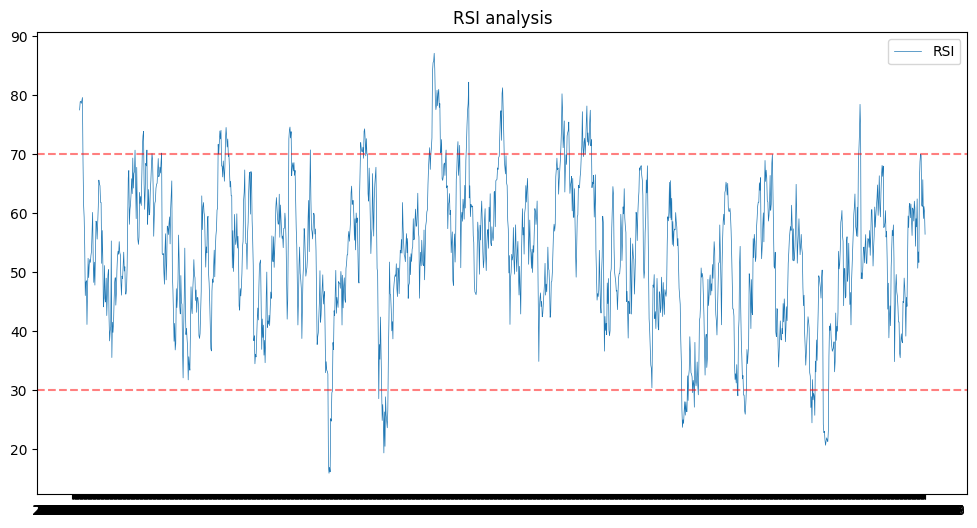

In [ ]:
# RELATIVE STRENGTH INDEX
dif['RSI'] = ta.momentum.rsi(dif['Close'],window=14)
# dibn.head()
dif.tail()

# plotting RSI
plt.figure(1,(12,6))
plt.plot(dif['RSI'],label='RSI',linewidth=0.5)
plt.axhline(70,linestyle='--',color='red',alpha=0.5)
plt.axhline(30,linestyle='--',color='red',alpha=0.5)
plt.title('RSI analysis')
plt.legend()


In [ ]:
dif.to_csv('infosys_stock_analysis_2018_to_2024.csv')
dif.tail()

,Unnamed: 0,Symbols,Close,High,Low,Open,Volume,SMA_20,SMA_50,BB_High,BB_Low,RSI
Date,,,,,,,,,,,,
2023-12-22,4,INFY,18.76,18.890,18.64,18.70,7018217.0,17.9460,17.3184,18.958352,16.933648,65.698093
2023-12-26,3,INFY,18.45,18.670,18.37,18.64,3866164.0,18.0000,17.3494,18.998819,17.001181,59.123395
2023-12-27,2,INFY,18.60,18.680,18.45,18.64,4337972.0,18.0485,17.3772,19.064793,17.032207,61.149376
2023-12-28,1,INFY,18.56,18.685,18.53,18.61,3308664.0,18.0955,17.4014,19.115117,17.075883,60.291216
2023-12-29,0,INFY,18.38,18.530,18.32,18.50,2864894.0,18.1370,17.4262,19.131688,17.142312,56.451918


2018-01-01 00:00:00
2024-01-01 00:00:00
2018-01-01 00:00:00
2024-01-01 00:00:00


<ipython-input-45-db45675a3ddd>:45: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,1,1)


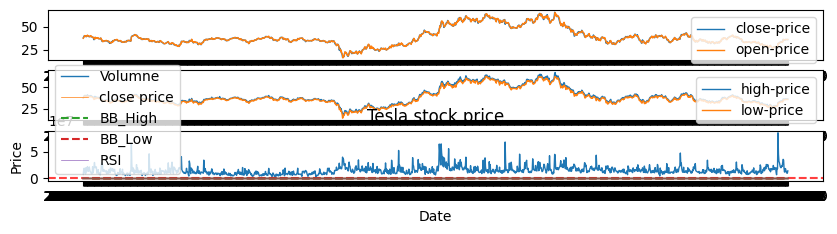

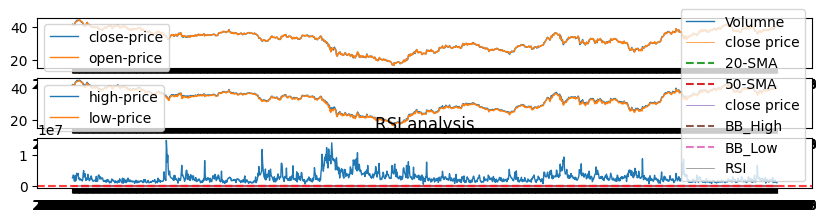

In [ ]:
li = ['GM','HSBC']
for i in range (len(li)):
  import pandas_datareader as pdr
  import pandas as pd
  import datetime

  start = datetime.datetime(2018,1,1)
  end = datetime.datetime(2024,1,1)
  print(start)
  print(end)

  # saving required data into variable
  stock=[li[i]]
  data = pdr.DataReader(stock,'stooq',str(start.date()),end.date()).stack('Symbols')
  data.head()

  #creating csv file
  ndata = data.reset_index()
  ndata.head()
  yes = li[i]
  ndata.to_csv('%str_stock_2018_to_2024.csv'%yes)

  from os import close
  # plot the close price from infosys stock
  # load the csv file

  li[i] = pd.read_csv('/content/%str_stock_2018_to_2024.csv'%yes)

  # set date as the index
  li[i].set_index('Date',inplace=True)
  li[i].sort_index(ascending=True,inplace=True)
  li[i].head()

  # separate the close price
  cl_dibn = li[i]['Close']

  # plot the close price
  import matplotlib.pyplot as plt

  cl_dibn.plot(xlabel='Date',ylabel='Price',
                label='Tsla',title='Tesla stock price',figsize=(10,3))

  # plotting the diiferences
  plt.figure(i,(16,7))
  plt.subplot(4,1,1)
  plt.plot(li[i]['Close'],label='close-price',linewidth=1)
  plt.plot(li[i]['Open'],label='open-price',linewidth=1)
  plt.legend()


  plt.subplot(4,1,2)
  plt.plot(li[i]['High'],label='high-price',linewidth=1)
  plt.plot(li[i]['Low'],label='low-price',linewidth=1)
  plt.legend()

  plt.subplot(4,1,3)
  plt.plot(li[i]['Volume'],label='Volumne',linewidth=1)

  li[i].head()

  # calculate the MOVING AVERAGE
  li[i]['SMA_20'] = li[i]['Close'].rolling(20).mean()
  li[i]['SMA_50'] = li[i]['Close'].rolling(50).mean()
  plt.figure(1)
  plt.plot(li[i]['Close'],label='close price',linewidth=0.5)
  plt.plot(li[i]['SMA_20'],label='20-SMA',linestyle='--')
  plt.plot(li[i]['SMA_50'],label='50-SMA',linestyle='--')

  plt.title('Moving average analysis')
  plt.legend()

  import ta

  #BOLLINGER BANDS
  bb = ta.volatility.BollingerBands(li[i]['Close'],window=20,window_dev=2)
  li[i]['BB_High'] = bb.bollinger_hband()
  li[i]['BB_Low'] = bb.bollinger_lband()

  # calculate the with Bollinger Bands moving average
  plt.figure(i,(12,6))
  plt.plot(li[i]['Close'],label='close price',linewidth=0.5)
  plt.plot(li[i]['BB_High'],label='BB_High',linestyle='--')
  plt.plot(li[i]['BB_Low'],label='BB_Low',linestyle='--')
  plt.fill_between(li[i].index,li[i]['BB_High'],
                  li[i]['BB_Low'],color = 'gray',alpha=0.2)
  plt.title('Bolinger band analysis')
  plt.legend()

    # RELATIVE STRENGTH INDEX
  li[i]['RSI'] = ta.momentum.rsi(li[i]['Close'],window=14)
  # dibn.head()
  li[i].tail()

  # plotting RSI
  plt.figure(i,(12,6))
  plt.plot(li[i]['RSI'],label='RSI',linewidth=0.5)
  plt.axhline(70,linestyle='--',color='red',alpha=0.5)
  plt.axhline(30,linestyle='--',color='red',alpha=0.5)
  plt.title('RSI analysis')
  plt.legend()

  li[i].to_csv('{li[i]}_stock_analysis_2018_to_2024.csv')
  li[i].tail()

